# Instructions
### Explore this dataset using what you have learned in data preprocessing and data visualization
### Write a paragraph selecting the most important features (feature selection).
### Split your dataset into a training set and a testing set.
### Apply Linear regression to your training set.
### Plot the linear regression.
### Measure the performance of linear regression using the testing set.
### Apply multi-linear regression and compare it to the linear model.

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')
housing_df = data.copy()
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Data Exploration

In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.shape #To check for the size of the data

(21613, 21)

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
# we should go ahead to split our data into categorical and numerical but it is seen that out data is already in numerical
# but note that the date column is not in the standard format, however, this is not a problem because for the problem we are about to solve date is not an important feature anyways.
# so we update the dataframe as we drop the date column

In [11]:
data.drop('date',axis = 1, inplace = True)

In [12]:
data.drop('id', axis = 1, inplace = True)

# Feature Selection

In [13]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<Axes: >

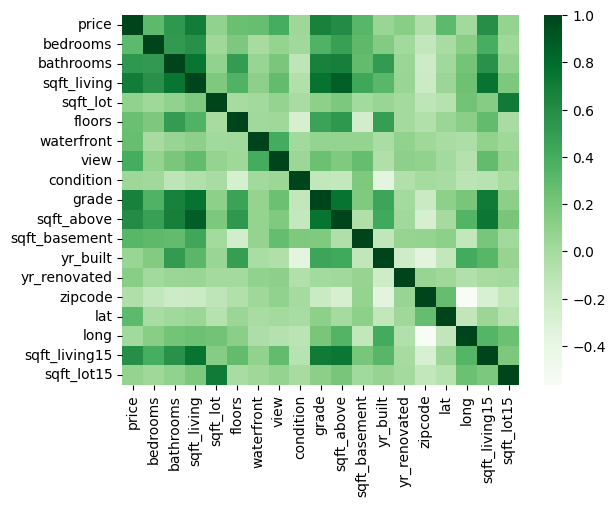

In [14]:
# Performing Multicollinearity
sns.heatmap(data.corr(), cmap='Greens')

In [15]:
abs(data.corr())>0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [16]:
# The folowing columns would be dropped due to fact that  share correlleration with several other
data.drop(['sqft_living', 'grade','sqft_above', 'sqft_living15'], axis = 1, inplace = True)


In [17]:
data.drop([])

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0,0,3,0,1955,0,98178,47.5112,-122.257,5650
1,538000.0,3,2.25,7242,2.0,0,0,3,400,1951,1991,98125,47.7210,-122.319,7639
2,180000.0,2,1.00,10000,1.0,0,0,3,0,1933,0,98028,47.7379,-122.233,8062
3,604000.0,4,3.00,5000,1.0,0,0,5,910,1965,0,98136,47.5208,-122.393,5000
4,510000.0,3,2.00,8080,1.0,0,0,3,0,1987,0,98074,47.6168,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,0,2009,0,98103,47.6993,-122.346,1509
21609,400000.0,4,2.50,5813,2.0,0,0,3,0,2014,0,98146,47.5107,-122.362,7200
21610,402101.0,2,0.75,1350,2.0,0,0,3,0,2009,0,98144,47.5944,-122.299,2007
21611,400000.0,3,2.50,2388,2.0,0,0,3,0,2004,0,98027,47.5345,-122.069,1287


In [18]:
data.shape

(21613, 15)

In [20]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

Text(0.5, 1.0, 'sqft_lot15')

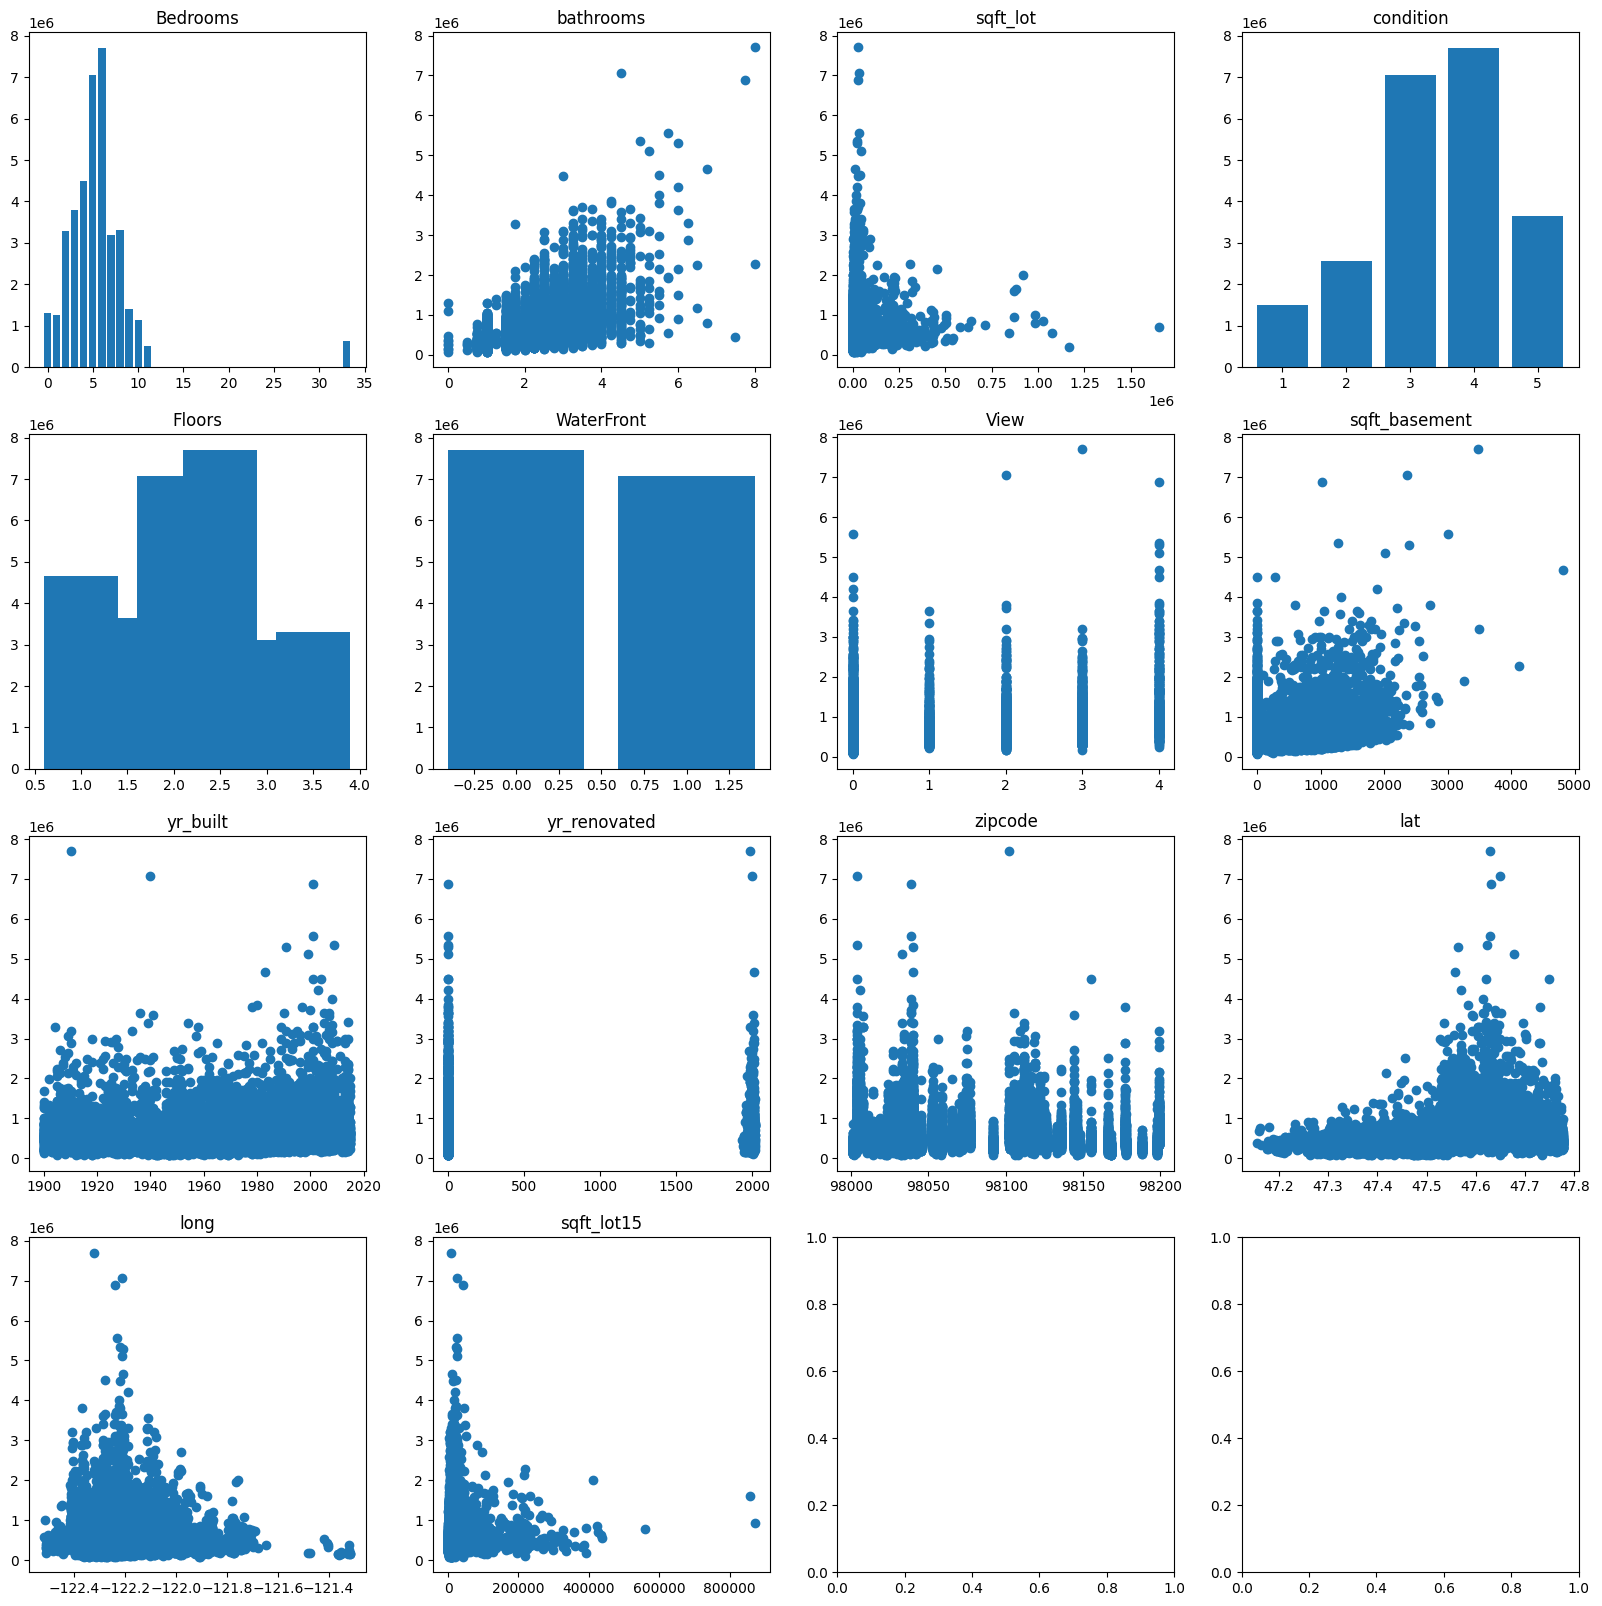

In [21]:
# Linearity Test
fig, axs = plt.subplots(4,4, figsize = (20,20))
axs[0, 0].bar( data['bedrooms'], data['price'])
axs[0, 0].set_title('Bedrooms')

axs[0, 1].scatter( data['bathrooms'], data['price'])
axs[0, 1].set_title('bathrooms')

axs[0, 2].scatter( data['sqft_lot'], data['price'])
axs[0, 2].set_title('sqft_lot')

axs[0, 3].bar( data['condition'], data['price'])
axs[0, 3].set_title('condition')

axs[1, 0].bar( data['floors'], data['price'])
axs[1, 0].set_title('Floors')

axs[1, 1].bar( data['waterfront'], data['price'])
axs[1, 1].set_title('WaterFront')

axs[1, 2].scatter( data['view'], data['price'])
axs[1, 2].set_title('View')

axs[1, 3].scatter( data['sqft_basement'], data['price'])
axs[1, 3].set_title('sqft_basement')

axs[2, 0].scatter( data['yr_built'], data['price'])
axs[2, 0].set_title('yr_built')

axs[2, 1].scatter( data['yr_renovated'], data['price'])
axs[2, 1].set_title('yr_renovated')

axs[2, 2].scatter( data['zipcode'], data['price'])
axs[2, 2].set_title('zipcode')

axs[2, 3].scatter( data['lat'], data['price'])
axs[2, 3].set_title('lat')

axs[3, 0].scatter( data['long'], data['price'])
axs[3, 0].set_title('long')

axs[3, 1].scatter( data['sqft_lot15'], data['price'])
axs[3, 1].set_title('sqft_lot15')


In [22]:
# fig, axs = plt.subplots(4, 4, figsize=(20, 20))

# features = ['bedrooms', 'bathrooms', 'sqft_lot', 'condition', 'floors', 'waterfront', 'view',
#             'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15']

# for i in range(4):
#     for j in range(4):
#         feature = features[i * 4 + j]

#         if data[feature].dtype == 'object' or data[feature].nunique() < 10:
#             axs[i, j].bar(data[feature], data['price'])
#         else:
#             axs[i, j].scatter(data[feature], data['price'])

#         axs[i, j].set_title(feature)

# plt.tight_layout()
# plt.show()

In [23]:
# i would be using the folllowing features beacause they are graphically proven to have effects on the target column
new_data = data[['price','bedrooms', 'bathrooms', 'condition', 'floors','sqft_basement', 'lat' ]]

In [24]:
new_data.head()

,price,bedrooms,bathrooms,condition,floors,sqft_basement,lat
0,221900.0,3,1.00,3,1.0,0,47.5112
1,538000.0,3,2.25,3,2.0,400,47.7210
2,180000.0,2,1.00,3,1.0,0,47.7379
3,604000.0,4,3.00,5,1.0,910,47.5208
4,510000.0,3,2.00,3,1.0,0,47.6168


# Splitting the data into Feature set and label

In [25]:
x = new_data.drop(['price'], axis = 1)
y = new_data['price']

In [26]:
x

,bedrooms,bathrooms,condition,floors,sqft_basement,lat
0,3,1.00,3,1.0,0,47.5112
1,3,2.25,3,2.0,400,47.7210
2,2,1.00,3,1.0,0,47.7379
3,4,3.00,5,1.0,910,47.5208
4,3,2.00,3,1.0,0,47.6168
...,...,...,...,...,...,...
21608,3,2.50,3,3.0,0,47.6993
21609,4,2.50,3,2.0,0,47.5107
21610,2,0.75,3,2.0,0,47.5944
21611,3,2.50,3,2.0,0,47.5345


# Scaling the Feature data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x)
x_scaled = scaler.transform(x)

# scaler = StandardScaler()
# model = scaler.fit(data)
# scaled_data = model.transform(data)

# Train Test split

In [28]:
from scipy import rand
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 458)


In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17290, 6), (17290,), (4323, 6), (4323,))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_preds = lin_model.predict(X_test)

# The coefficients
print("Coefficients: \n", lin_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Accuracy %.2f" % r2_score(y_test, y_preds))



Coefficients: 
 [  8157.03577798 154855.52268518  32240.26219816  34833.50507417
  63498.23510849 101221.45723962]
Mean squared error: 79066979277.49
Accuracy 0.40


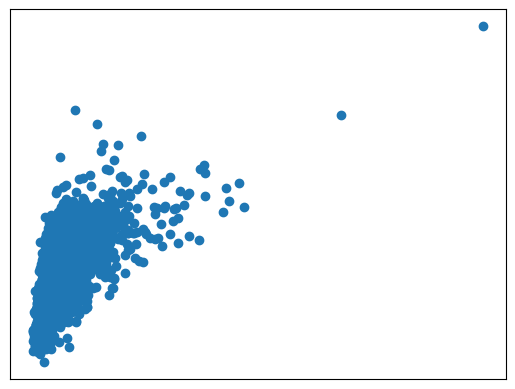

In [31]:
# Plot outputs
plt.scatter(y_test, y_preds)

plt.xticks(())
plt.yticks(())

plt.show()

In [32]:
y_preds.shape, y_test.shape

((4323,), (4323,))

<Axes: ylabel='price'>

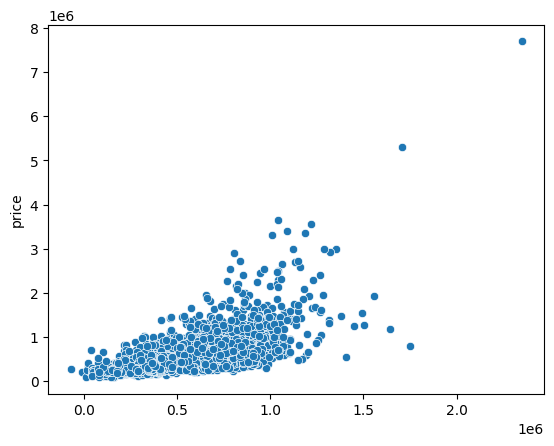

In [33]:
sns.scatterplot(x = y_preds,y = y_test)

In [34]:
mse_lr = mean_squared_error(y_test, y_preds)
print(f'Mean Squared Error (Linear Regression): {mse_lr}')

Mean Squared Error (Linear Regression): 79066979277.49242


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f'Mean Squared Error (Decision Tree Regression): {mse_dt}')

Mean Squared Error (Polynomial Regression): 62672442314.85264
Mean Squared Error (Decision Tree Regression): 114127728855.62044


In [37]:
accuracy = r2_score(y_test, y_pred_dt)

In [38]:
accuracy

0.13496478952706636

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)
acc = r2_score(y_test,rf_pred)

In [40]:
print(acc)

0.5868023496126
